## Бутстрап. Выборочная статистика. Доверительные интервалы.

In [242]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy. stats import sem # для определения стандартной ошибки среднего

In [243]:
# сгенерируем массив случайных значений с нормальным распределением
population = np.random.normal(size=5000)
population

array([ 0.40156578,  0.24646002, -1.26597437, ..., -0.78072983,
        0.33081995, -0.63223085])

In [244]:
# стандартное отклонение популяции
sd_population = np.std(population)
sd_population

0.997503759428346

In [245]:
# среднее популяции
population.mean()

-0.006652728653058887

<AxesSubplot:ylabel='Count'>

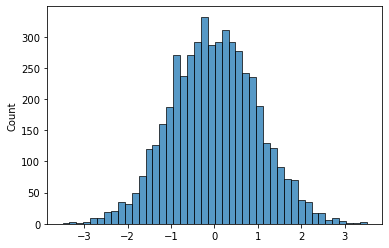

In [246]:
# гистограмма
sns.histplot(data=population)

**Выборка** - это подмножество данных из **генеральной совокупности** (или популяции).

**Выборочная статистика** - показатель статистики, вычисленный для для выборки из популяции. 

**Выборочное распределение** - распределение выборочной статистики на большом числе выборок, вынимаемой из одной и той же популяции.

**Центральная предельная теорема** (ЦПТ)- тенденция выборочного распределения принимать нормальную форму по мере увеличения размера выборки, даже если исходная популяция не является нормально распределенной.

**Стандартная ошибка** (standart error, se) - стандартное отклонение выборочной статистки на многочисленных выборках. По другому: мера изменчивости оценки между выборками. Стандартную ошибку можно оценить с использованием статистики, опираясь на стандартное отклонение s значений выборки и размер выборки n:
$se=\frac{sd}{\sqrt{n}}$

Один из простых и эффективных способов оценки выборочного распределения статистики состоит в том, чтобы вынимать дополнительные выборки с возвратом из самой выборки и повторно вычислять статистику для каждой повторной выборки. Данная процедура называется бутстрапом (от англ. **bootstrap** )

Алгоритм бутстрапа для среднего значения для выборки размером n:
1. извлечь выборку n элементов с возвратом данных
2. записать целевую статистику для этой выборки
3. повторить шаги 1 и 2 много (R раз)
4. использовать результаты:
    - вычисления их стандартного отколонения = стандартная ошибка выборочного среднего
    - постороения гистограммы
    - нахождения доверительного интервала
    
Число итераций R устанавливается произвольно. Чем больше R, тем точнее оценка стандартной ошибки или доверительного интервала.    

### Выборочное распределение средних

<AxesSubplot:ylabel='Count'>

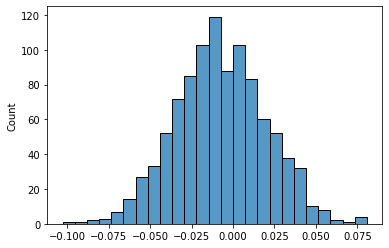

In [247]:
# бустраповская выборка
# отберем n случайных элементов r раз
# сохраним все эти выборки
n = 1000
r = 1000
samples = [] # список для хранения всех выборок
for _ in range(r):
    z = random.sample(list(population), n) # сгенерируем случаную выборку n-элементов из популяции
    samples.append(z)
    
# посчитаем среднюю для каждой выборки, сохраним в виде списка и посторим по нему гистограмму, 
# и убедимся, что средние по всем выборкам (распределение выборочных средних) имеют нормальное распределение
m = []
for sample in samples:
    m.append(np.array(sample).mean())
    
sns.histplot(data=m)   

### Стандартная ошибка среднего

Стандартная ошибка среднего — это мера того, насколько разбросаны значения вокруг среднего.\
По мере увеличения размера выборки стандартная ошибка среднего имеет тенденцию к уменьшению.\
Чтобы проиллюстрировать это, рассмотрим стандартную ошибку среднего для нескольких наборов данных:

In [248]:
# Стандартная ошибка среднего для выборки из 10 элементов
sem(random.sample(list(population), 10))

0.18464135678523189

In [249]:
# Стандартная ошибка среднего для выборки из 100 элементов
sem(random.sample(list(population), 100))

0.09211686633240676

In [250]:
# Стандартная ошибка среднего для выборки из 500 элементов
sem(random.sample(list(population), 500))

0.04412664211814002

In [251]:
# Стандартная ошибка среднего для выборки из 1000 элементов
sem(random.sample(list(population), 1000))

0.031363736642671426

In [252]:
# Стандартная ошибка среднего для выборки из 5000 элементов
sem(random.sample(list(population), 5000))

0.014108244346000038

#### Проверка теоретической формулы для ошибки среднего методом бутстрапа

In [319]:
# выше находили m - выборочные средние для бутстраповских выборок размером n
# найдем стандартное отклонение по ним = стандартная ошибка выборочного среднего
np.std(m)

0.02736111986762817

In [320]:
# теперь посчитаем стандартную ошибку среднего по теоретической формуле
# сделаем случайную выборку также из n элементов
sample = random.sample(list(population), n)
# стандартное отклонение этой выборки
sd_sample = np.std(sample)
# стандартная ошибка среднего по формуле
se_sample = sd_sample / (n**0.5)
se_sample

0.031787857277721016

In [321]:
# так как у нас известно стандратное отклонение всей популяции,
# то в формулу можем подставить именно ее, а не выборчное станд. отклонение 
sd_population/(n**0.5)

0.03154383854374232

In [113]:
# Практическое значение (полученное бутстрапом) и теоретическое (расчитанное по формуле) примерно совпдадают.

### Доверительные интервалы
Доверительные интервалы (ДИ) — это еще один способ понять потенциальную ошибку в оценке выборки.
* По ЗБЧ среднее значение выборочных средних стретимся к среднему ГС.
* По ЦПТ распределение оценок среднего стремится к нормальному распределению.
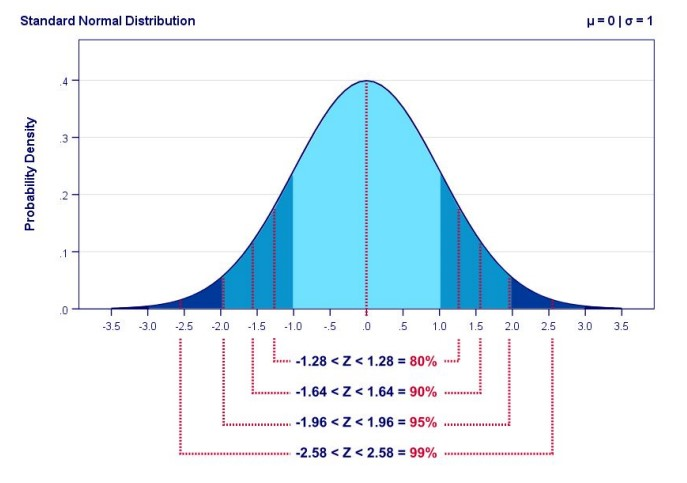

ДИ - это интервал, который покрывает оцениваемый параметр с заданной вероятностью. \
Вероятность следует понимать в том смысле, что если бы мы провели эксперимент множество раз, то в среднем для 95% доверительного интервала **в 95 экспериментах из 100 истинный параметр принадлежал бы доверительному интервалу**.

Как правило, используется ДИ 95%.

ДИ для среднего имеет вид: $(\overline{x} - \Delta; \overline{x} + \Delta)$,

где $\Delta$ - точность интервальной оценки, $\Delta = z_{1-\alpha/2} * se$

Уровень значимости $\alpha$ - это вероятность, с которой значение параметра НЕ попадет в ДИ. \
Уровень доверия $(1-\alpha)$ - это вероятность, с которой значение параметра попадет в ДИ.\
$z_{1-\alpha/2}$ - это  квантиль нормального распределения для уровня $(1-\alpha)$.

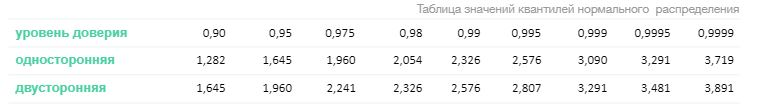

Пример: ДИ = 95% \
уровень доверия = 0,95\
уровень значимости = 0,05\
Доверительный интервал рассчитывается так: 
$[\overline{x}-1.96*se; \overline{x}+1.96*se]$

In [332]:
# Рассмотрим на примере выборки sample
# выборочное среднее
m_sample = np.array(sample).mean()
print(m_sample)
# выборочное станд отклонение
sd_samle = np.std(sample)
print(sd_samle)

0.050944464782927044
1.00522030933958


In [333]:
# По формуле для ДИ 95% рассчитаем левую и правые крайние точки интервала
left = m_sample - 1.96*sd_samle
print(left)
right = m_sample + 1.96*sd_samle
print(right)

-1.9192873415226495
2.0211762710885037


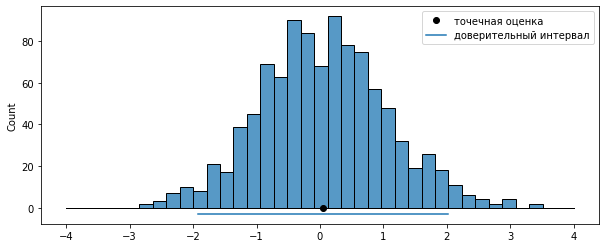

In [334]:
# визулизируем в виде гистограммы
plt.figure(figsize=(10, 4))
graph = sns.histplot(data=sample, bins=30)
graph.plot([m_sample], [0], 'o', c='k', markersize=6, label='точечная оценка')
graph.plot((-4, 4), [0, 0], linewidth=1, c='k')
graph.plot((left, right), [-3,-3], label='доверительный интервал')
graph.legend(loc='upper right')

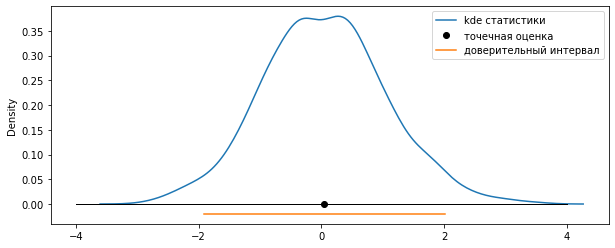

In [335]:
# визулизируем в виде kde
plt.figure(figsize=(10, 4))
graph = sns.kdeplot(data=sample, label='kde статистики')
graph.plot([m_sample], [0], 'o', c='k', markersize=6, label='точечная оценка')
graph.plot((-4, 4), [0, 0], linewidth=1, c='k')
graph.plot((left, right), [-0.02,-0.02], label='доверительный интервал')
graph.legend(loc='upper right')


### Обратная задача: Сколько пользователей нужно включить в тест,  чтобы обеспечить 95% точность?
По доверительному интервалу найти минимальный объем выборки, чтобы с заданной точностью и уровнем доверия оценить среднее:

$$\Delta = z_{1-\alpha/2} * se$$ где  $se = \frac{\sigma}{\sqrt{n}}$ \
Отсюда:

$$n = \bigg(\frac{z_{1-\alpha/2}*sd}{\Delta}\bigg)^2$$

На практике для вычисления доверительных интервалов используется t-распредление стьюдента 

0.014108244346000038